<a href="https://colab.research.google.com/github/Manoharjha333/EDA/blob/main/bank_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [13]:
df = pd.read_csv('/content/bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.19,5195.80,no


In [14]:
df.shape
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.80,92.89,-46.20,1.35,5099.10,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.40,93.44,-36.10,4.97,5228.10,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,no


In [15]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00,4119.00
mean,40.11,256.79,2.54,960.42,0.19,0.08,93.58,-40.50,3.62,5166.48
std,10.31,254.70,2.57,191.92,0.54,1.56,0.58,4.59,1.73,73.67
min,18.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.64,4963.60
25%,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.33,5099.10
50%,38.00,181.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,317.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,88.00,3643.00,35.00,999.00,6.00,1.40,94.77,-26.90,5.04,5228.10


In [18]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [19]:
df["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [20]:
df["marital"].value_counts(normalize = True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

In [21]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2231,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.10,93.80,-40.40,5.04,5195.80,no
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.97,5228.10,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.80,92.89,-46.20,1.24,5099.10,yes
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [22]:

df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.40,92.38,-29.80,0.81,5017.50,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.90,4991.60,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.80,93.88,-40.00,0.68,5008.70,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.80,92.89,-46.20,1.34,5099.10,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.80,92.89,-46.20,1.33,5099.10,no


In [23]:
df.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

In [24]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.80,92.89,-46.20,1.31,5099.10,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.19,5195.80,0


In [25]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


In [26]:
df[df["y"] == 1].mean() 

age                41.89
duration          560.79
campaign            1.98
pdays             778.72
previous            0.59
emp.var.rate       -1.18
cons.price.idx     93.42
cons.conf.idx     -39.79
euribor3m           2.15
nr.employed      5093.12
y                   1.00
dtype: float64

In [27]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


In [28]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")


Average age of attracted clients = 32 years


In [29]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,0


In [30]:

pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


In [31]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.62,0.27,0.00
1,0.10,0.56,0.34,0.00


In [32]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.24,261.87
blue-collar,39.27,261.85
entrepreneur,42.20,249.20
housemaid,45.67,229.66
management,42.43,246.80
retired,60.87,311.79
self-employed,40.68,254.92
services,38.51,232.53
student,26.70,287.13


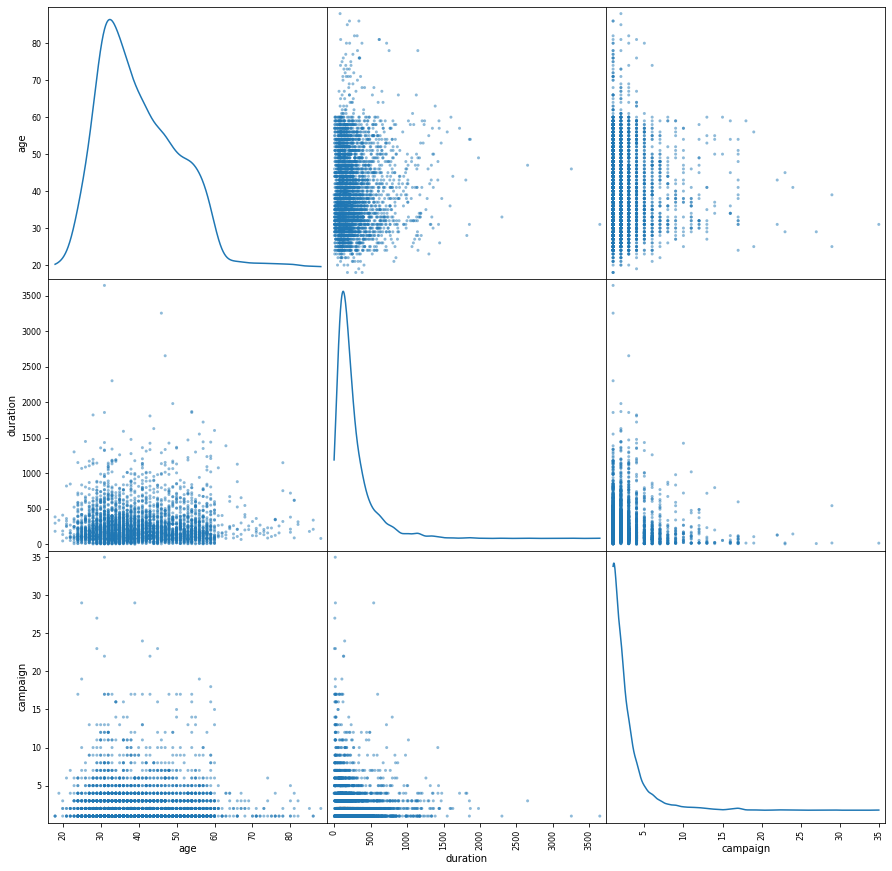

In [33]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

<AxesSubplot:>

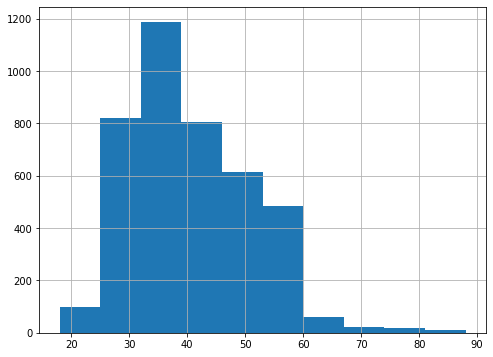

In [34]:
df["age"].hist()

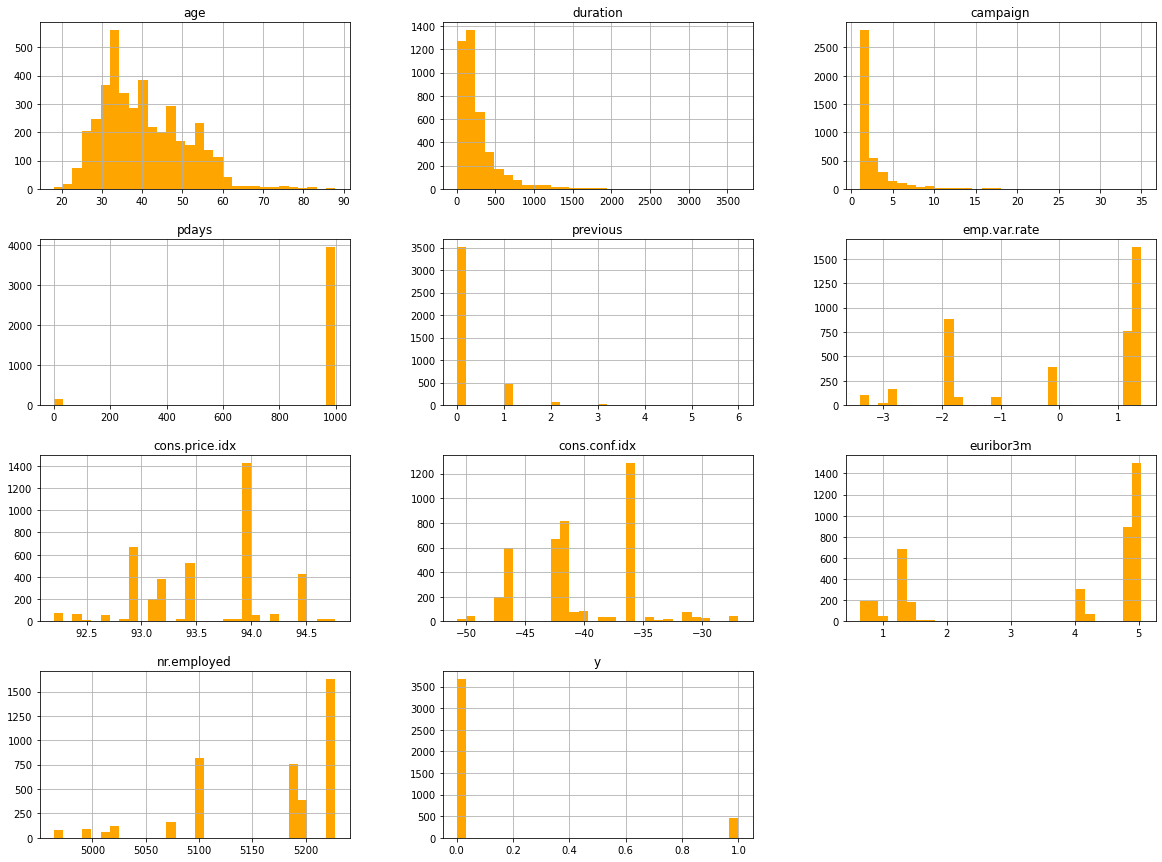

In [36]:
df.hist(color = "orange",
        bins = 30,
        figsize = (20, 15))
plt.show()

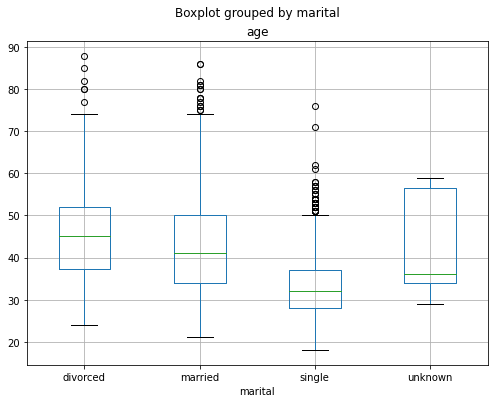

In [37]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

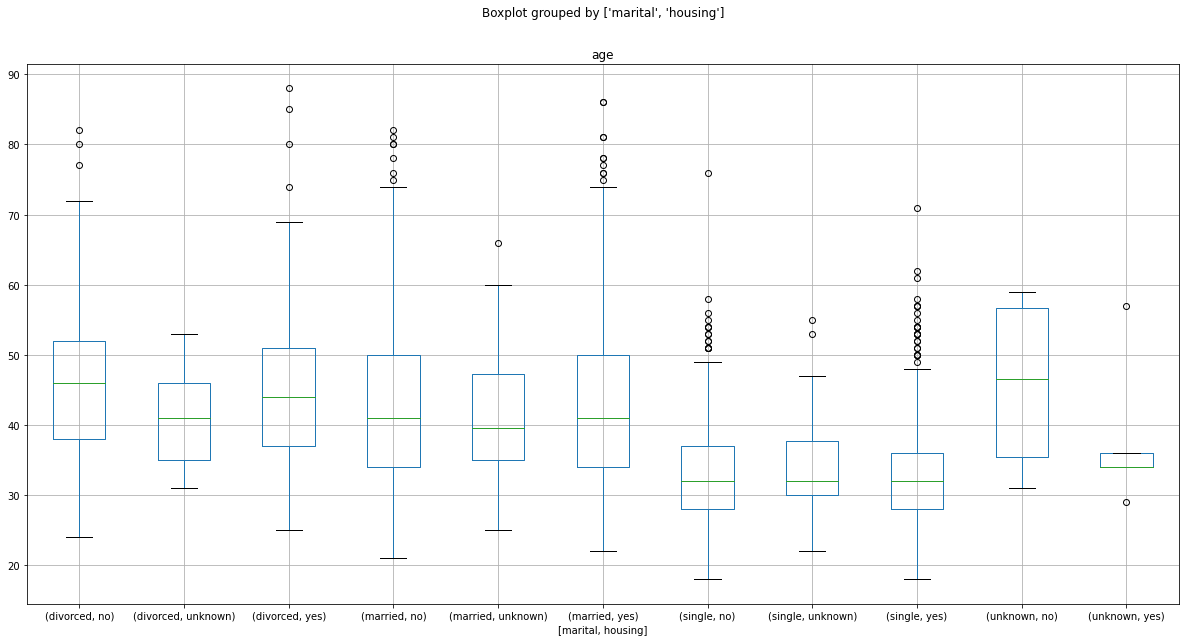

In [41]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 10))
plt.show()

In [42]:
df.sort_values(by = "campaign", ascending = False).head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,no,cellular,jul,thu,...,35,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
3564,25,admin.,single,basic.9y,no,no,no,cellular,jul,thu,...,29,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
3241,39,services,married,high.school,no,yes,no,cellular,jul,thu,...,29,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
56,29,admin.,single,university.degree,no,yes,no,telephone,jun,fri,...,27,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
2485,41,technician,married,high.school,no,yes,no,telephone,jun,fri,...,24,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
2988,45,services,married,professional.course,no,yes,no,cellular,jul,mon,...,23,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
713,43,admin.,married,high.school,no,yes,no,cellular,jul,mon,...,22,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
3569,31,admin.,single,high.school,no,no,no,telephone,may,thu,...,22,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
886,56,technician,married,university.degree,unknown,no,no,cellular,jul,mon,...,19,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0


In [43]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean          count         
                      age campaign   age campaign
education                                        
basic.4y            47.66     2.42   429      429
basic.6y            40.14     2.65   228      228
basic.9y            39.23     2.35   574      574
high.school         38.10     2.63   921      921
illiterate          42.00     4.00     1        1
professional.course 40.21     2.51   535      535
university.degree   39.02     2.58  1264     1264
unknown             42.83     2.54   167      167

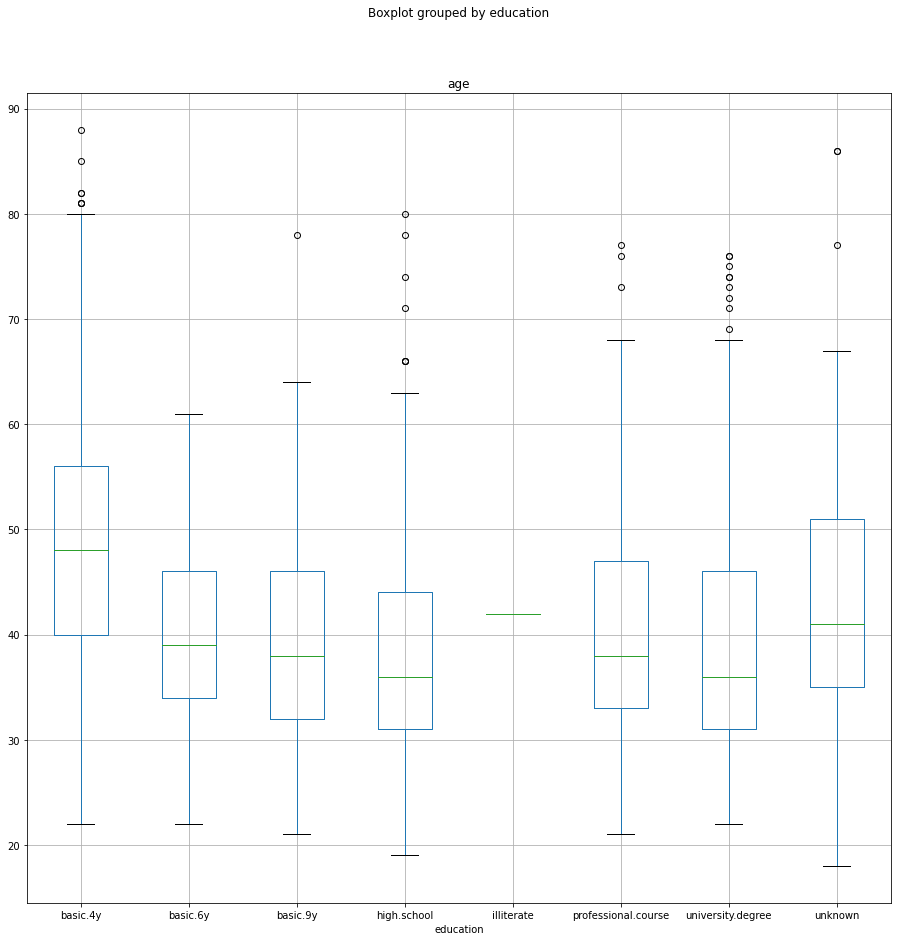

In [44]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()